In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
from scipy.stats import chi2_contingency
import math

In [2]:
def calculate_expected_values(data):
    row_indices = np.arange(data.shape[0])+2
    col_indices = np.arange(data.shape[1])+2
    # print(row_indices)
    # print(col_indices)
    # print(data)
    row_sums = np.sum(data, axis=1)
    col_sums = np.sum(data, axis=0)

    # Calculate E(XY)
    # Scaled Down by 10 to account for decimal multiplication on values scaled up by 100
    expected_xy = np.sum(np.outer(row_indices, col_indices) * data) / (np.sum(data) * 100)

    # Calculate E(X)
    expected_x = np.sum(row_indices * row_sums) / (np.sum(row_sums) * 1)

    # Calculate E(Y)
    expected_y = np.sum(col_indices * col_sums) / (np.sum(col_sums) * 1)

    return expected_xy, expected_x, expected_y

def plot_heatmap(data, title="Heatmap"):
    card_mapping = {
        0: '2', 1: '3', 2: '4', 3: '5', 4: '6', 5: '7', 6: '8', 7: '9', 8: '10', 9: 'J', 10: 'Q', 11: 'K', 12: 'A'
    }

    # Reverse the order of rows in the data array
    flipped_data = np.flipud(data)

    plt.figure(figsize=(10, 8))
    plt.imshow(flipped_data, cmap="RdYlBu_r", interpolation="nearest")
    plt.colorbar(label="Frequency")
    plt.title(title)
    plt.xlabel("Second Card Value")
    plt.ylabel("First Card Value")

    for i in range(flipped_data.shape[0]):
        for j in range(flipped_data.shape[1]):
            plt.text(j, i, f'{flipped_data[i, j]:.2f}%', ha='center', va='center', color='black', fontsize=8)
    
    expected_xy, expected_x, expected_y = calculate_expected_values(flipped_data)
    
    text_x = flipped_data.shape[1] - 0.5
    text_y = flipped_data.shape[0] - 0.5

    # Move the expected value text down by 10 pixels
    text_y_offset = -1.125
    plt.text(text_x, text_y - text_y_offset, f'E(Card 1 * Card 2): {expected_xy:.2f}%', ha='center', va='center', color='black', fontsize=8)
    plt.text(text_x, text_y - text_y_offset - .25, f'E(Card 1): {expected_x:.2f}%', ha='center', va='center', color='black', fontsize=8)
    plt.text(text_x, text_y - text_y_offset - .5, f'E(Card 2): {expected_y:.2f}%', ha='center', va='center', color='black', fontsize=8)


    plt.xticks(range(len(card_mapping)), [card_mapping[i] for i in range(len(card_mapping))])
    plt.yticks(range(len(card_mapping)), [card_mapping[i] for i in range(len(card_mapping))][::-1])  # Reverse the order
    plt.show()



def plot_3d(data, title="Heatmap", elev=20, azim=30):
    card_mapping = {
        0: '2', 1: '3', 2: '4', 3: '5', 4: '6', 5: '7', 6: '8', 7: '9', 8: '10', 9: 'J', 10: 'Q', 11: 'K', 12: 'A'
    }

    # Reverse the order of rows in the data array
    flipped_data = np.flipud(data)

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    x = np.arange(flipped_data.shape[1])
    y = np.arange(flipped_data.shape[0])

    x, y = np.meshgrid(x, y)

    # Create a 3D topological map
    surface = ax.plot_surface(x, y, flipped_data, cmap="RdYlBu_r", rstride=1, cstride=1, alpha=0.8, antialiased=True)

    ax.set_xlabel("Second Card Value")
    ax.set_ylabel("First Card Value")
    ax.set_zlabel("Frequency")
    ax.set_title(title)

    
    # Customize ticks and labels
    ax.set_xticks(np.arange(len(card_mapping)))
    ax.set_yticks(np.arange(len(card_mapping))[::-1])  
    ax.set_xticklabels([card_mapping[i] for i in range(len(card_mapping))])
    ax.set_yticklabels([card_mapping[i] for i in range(len(card_mapping))])  

    fig.colorbar(surface, label="Frequency", shrink=0.5, aspect=10)
    ax.view_init(elev=elev, azim=azim)

    plt.show()

def plot_1st_marginal_pmf(data, title="Column Sum Heatmap"):
    card_mapping = {
        0: '2', 1: '3', 2: '4', 3: '5', 4: '6', 5: '7', 6: '8', 7: '9', 8: '10', 9: 'J', 10: 'Q', 11: 'K', 12: 'A'
    }

    row_sums = np.sum(data, axis=1)
    values = np.arange(len(row_sums)) + 2

    plt.figure(figsize=(10, 4))
    plt.step(values, row_sums, where='post', color='b')
    plt.title(title)
    plt.xlabel("Card Value")
    plt.ylabel("f(x) in %")
    plt.xticks(values, [card_mapping[i] for i in range(len(card_mapping))])

    # Calculate and annotate the expected value
    expected_value = np.sum(values * row_sums) / np.sum(row_sums)
    plt.axhline(expected_value, color='r', linestyle='--', label=f'Expected Value: {expected_value:.2f}%')
    plt.legend()

    # Print calculations
    # print(f"Values: {values}")
    # print(f"Row Sums: {row_sums}")
    # print(f"Expected Value Calculation: {values} * {row_sums} / {np.sum(row_sums)} = {expected_value:.2f}")
    
    plt.show()

def plot_2nd_marginal_pmf(data, title="Column Sum Heatmap"):
    card_mapping = {
        0: '2', 1: '3', 2: '4', 3: '5', 4: '6', 5: '7', 6: '8', 7: '9', 8: '10', 9: 'J', 10: 'Q', 11: 'K', 12: 'A'
    }

    column_sums = np.sum(data, axis=0)
    values = np.arange(len(column_sums)) + 2

    plt.figure(figsize=(10, 4))
    plt.step(values, column_sums, where='post', color='b')
    plt.title(title)
    plt.xlabel("Card Value")
    plt.ylabel("f(x) in %")
    plt.xticks(values, [card_mapping[i] for i in range(len(card_mapping))])

    # Calculate and annotate the expected value
    expected_value = np.sum(values * column_sums) / np.sum(column_sums)
    plt.axhline(expected_value, color='r', linestyle='--', label=f'Expected Value: {expected_value:.2f}%')
    plt.legend()

    # Print calculations
    # print(f"Values: {values}")
    # print(f"Column Sums: {column_sums}")
    # print(f"Expected Value Calculation: {values} * {column_sums} / {np.sum(column_sums)} = {expected_value:.2f}")
    
    plt.show()
def plot_marginal_cdf(data, title="Column Sum CDF", card_mapping=None):
    if card_mapping is None:
        card_mapping = {
            0: '2', 1: '3', 2: '4', 3: '5', 4: '6', 5: '7', 6: '8', 7: '9', 8: '10', 9: 'J', 10: 'Q', 11: 'K', 12: 'A'
        }

    column_sums = np.sum(data, axis=0)
    cdf = np.cumsum(column_sums) / np.sum(column_sums)

    plt.figure(figsize=(10, 4))
    plt.step(range(len(column_sums)), cdf, where='post', color='b')
    plt.title(title)
    plt.xlabel("Card Value")
    plt.ylabel("F(x)")
    plt.xticks(range(len(card_mapping)), [card_mapping[i] for i in range(len(card_mapping))])

    plt.show()

def plot_probabilities(probabilities):
    card_mapping = {
        0: 'High Card', 1: 'One Pair Frequency', 2: 'Two Pair', 3: 'Three of a kind', 4: 'Straight', 5: 'Flush', 6: 'Full House', 7: 'Four of a Kind', 8: 'Straight Flush', 9: 'Royal Flush'
    }

    # Calculate the PMF
    pmf = np.array(probabilities)

    # Calculate the CDF
    cdf = np.cumsum(pmf)

    # Plot PMF and CDF
    plt.figure(figsize=(30, 6))

    # Plot PMF
    plt.subplot(1, 2, 1)
    plt.step(range(1, len(pmf) + 1), pmf, color='blue', alpha=0.7, label='PMF')
    plt.title('Probability Mass Function (PMF)')
    plt.xlabel('Card')
    plt.ylabel('Probability')
    plt.xticks(range(1, len(pmf) + 1), [card_mapping[i] for i in range(len(pmf))])
    plt.legend()

    # Plot CDF
    plt.subplot(1, 2, 2)
    plt.step(range(1, len(cdf) + 1), cdf, color='red', alpha=0.7, label='CDF')
    plt.title('Cumulative Distribution Function (CDF)')
    plt.xlabel('Card')
    plt.ylabel('Cumulative Probability')
    plt.xticks(range(1, len(cdf) + 1), [card_mapping[i] for i in range(len(cdf))])
    plt.legend()

    plt.tight_layout()
    plt.show()

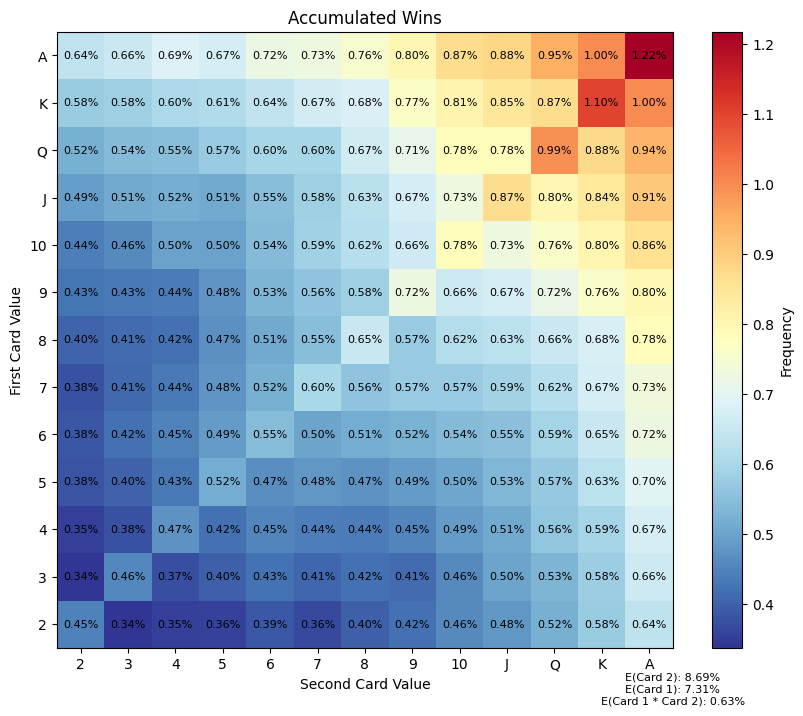

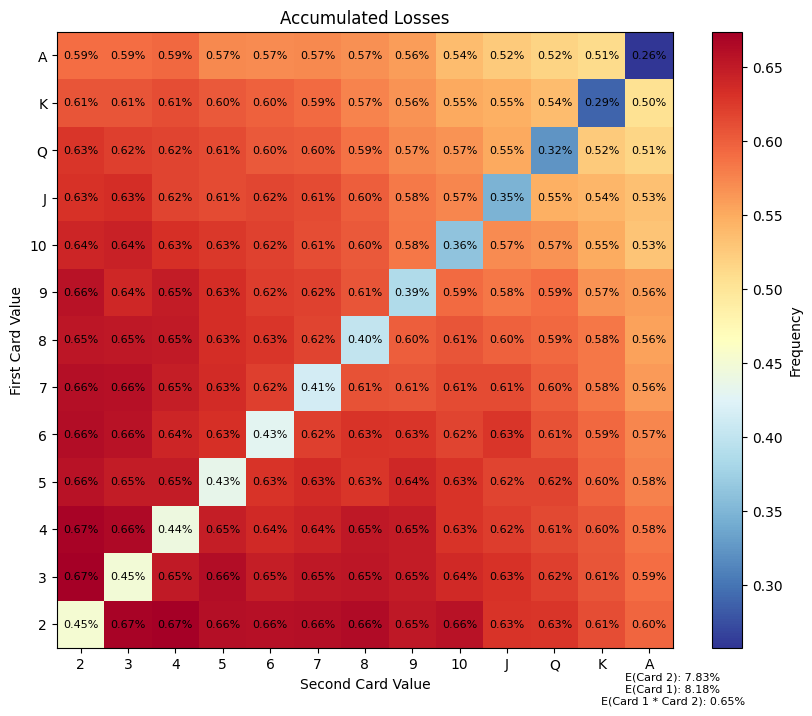

In [3]:
data = np.loadtxt("wins/accumulated_wins_100000_rounds.txt") 
# Standardize data so each cell is a percentage out of 100
data /= (np.sum(data) / 100)
plot_heatmap(data, title="Accumulated Wins")
data = np.loadtxt("losses/accumulated_losses_100000_rounds.txt")
# Standardize data so each cell is a percentage out of 100
data /= (np.sum(data) / 100)
plot_heatmap(data, title="Accumulated Losses")

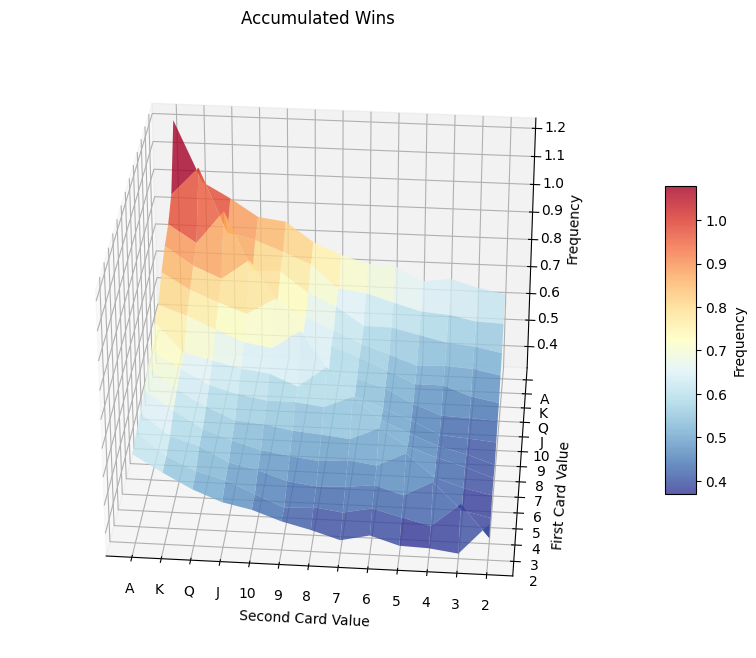

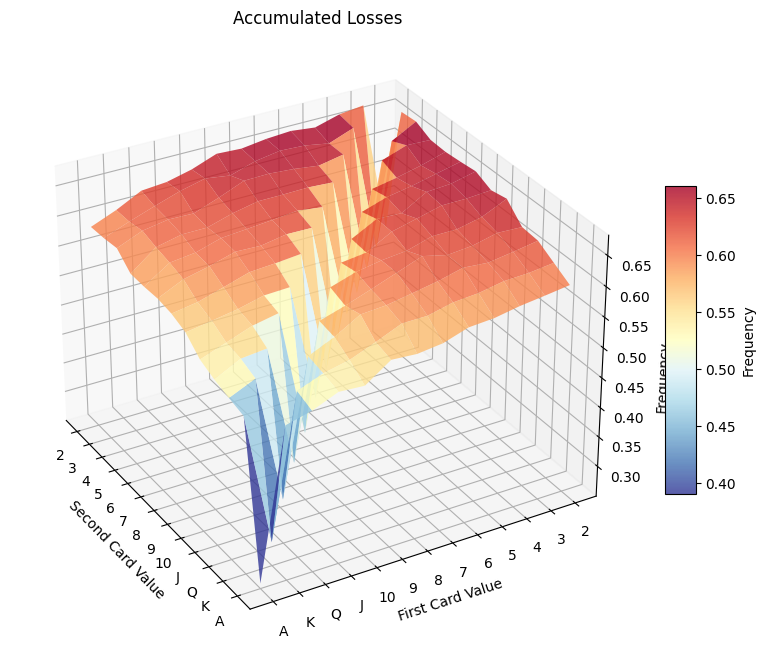

In [4]:
data = np.loadtxt("wins/accumulated_wins_100000_rounds.txt") 
# Standardize data so each cell is a percentage out of 100
data /= (np.sum(data) / 100)
plot_3d(data, title="Accumulated Wins", elev=30, azim=95)
data = np.loadtxt("losses/accumulated_losses_100000_rounds.txt")
# Standardize data so each cell is a percentage out of 100
data /= (np.sum(data) / 100)
plot_3d(data, title="Accumulated Losses", elev=30, azim=-30)

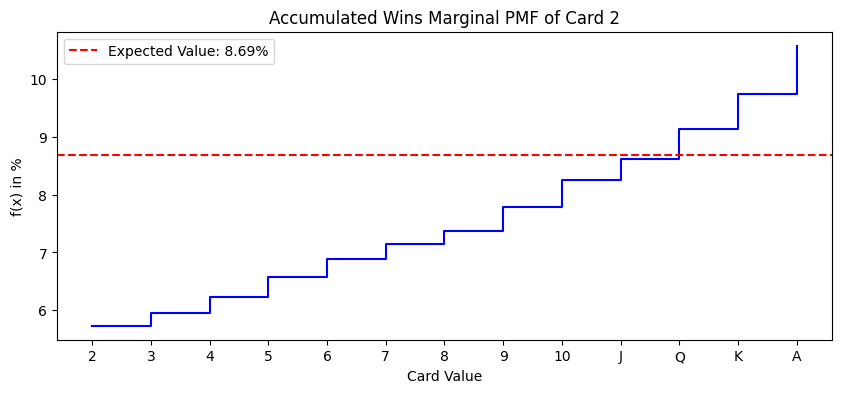

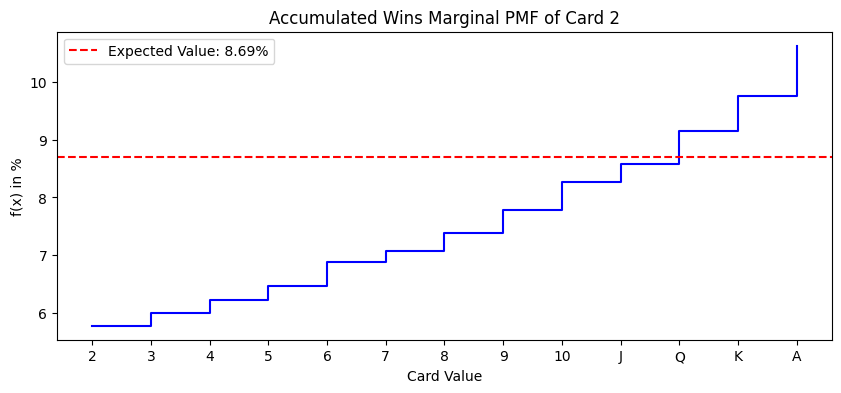

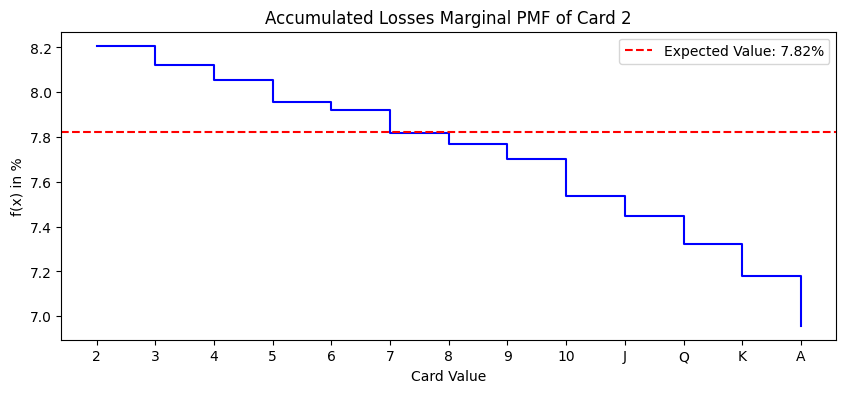

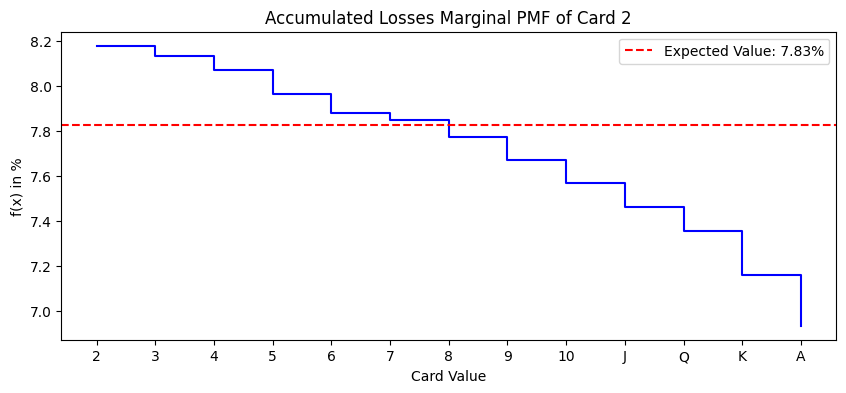

In [5]:
# CDFs are commented because they don't tell us as much
data = np.loadtxt("wins/accumulated_wins_100000_rounds.txt") 
# Standardize data so each cell is a percentage out of 100
data /= (np.sum(data) / 100)
plot_1st_marginal_pmf(data, title="Accumulated Wins Marginal PMF of Card 2")
plot_2nd_marginal_pmf(data, title="Accumulated Wins Marginal PMF of Card 2")
# plot_marginal_cdf(data, title="Accumulated Wins Marginal CDF of Card 2")
data = np.loadtxt("losses/accumulated_losses_100000_rounds.txt")
# Standardize data so each cell is a percentage out of 100
data /= (np.sum(data) / 100)
plot_1st_marginal_pmf(data, title="Accumulated Losses Marginal PMF of Card 2")
plot_2nd_marginal_pmf(data, title="Accumulated Losses Marginal PMF of Card 2")
# plot_marginal_cdf(data, title="Accumulated Losses Marginal CDF of Card 2")

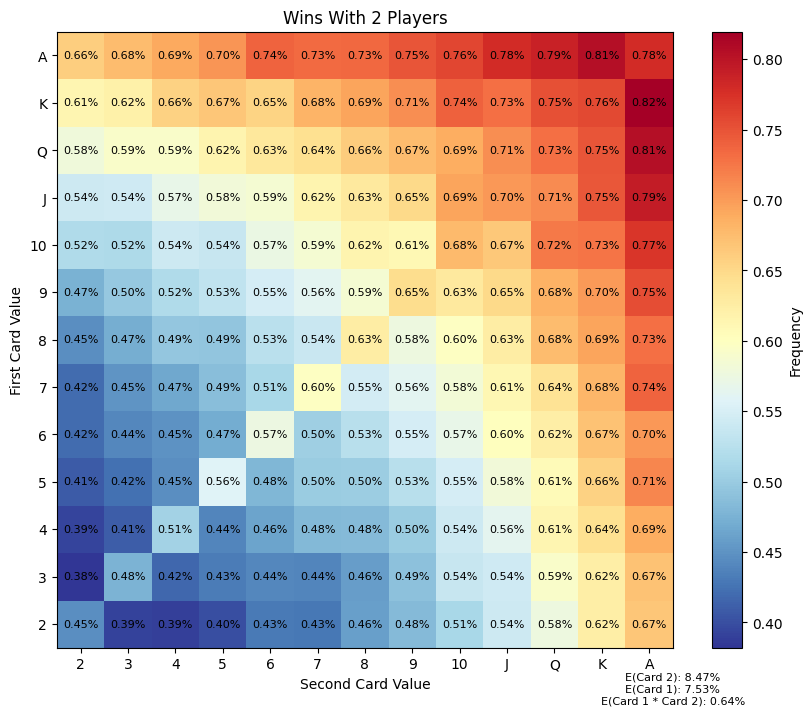

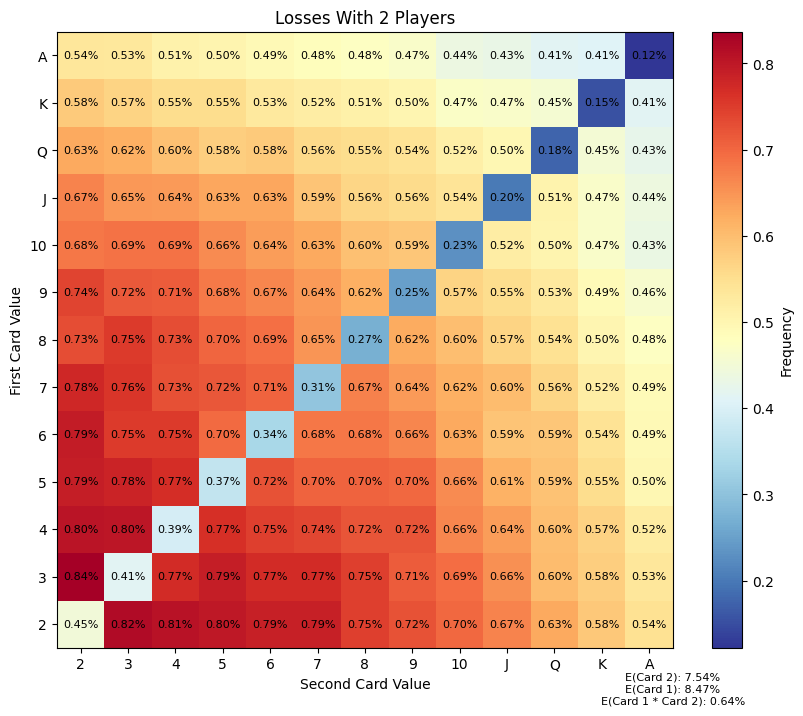

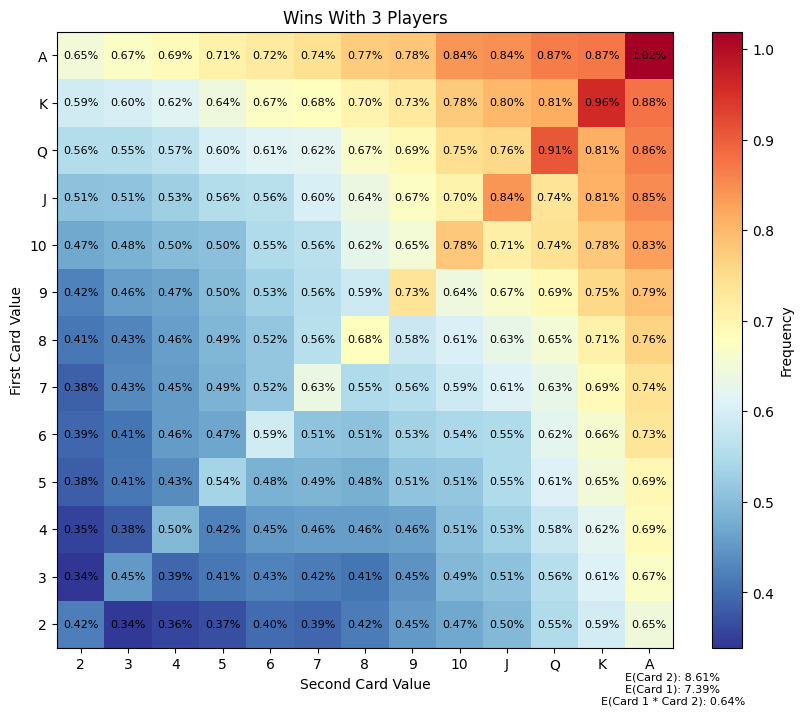

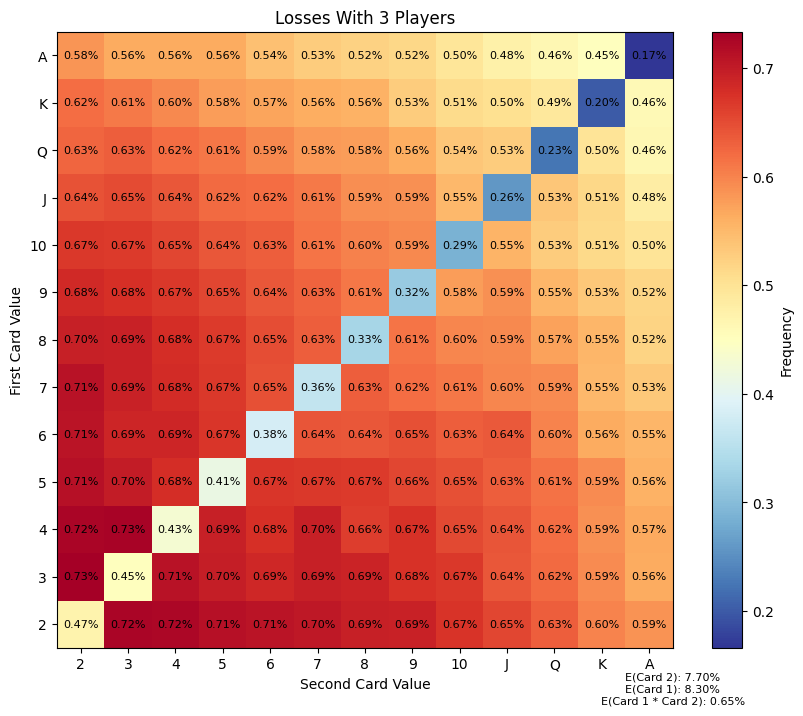

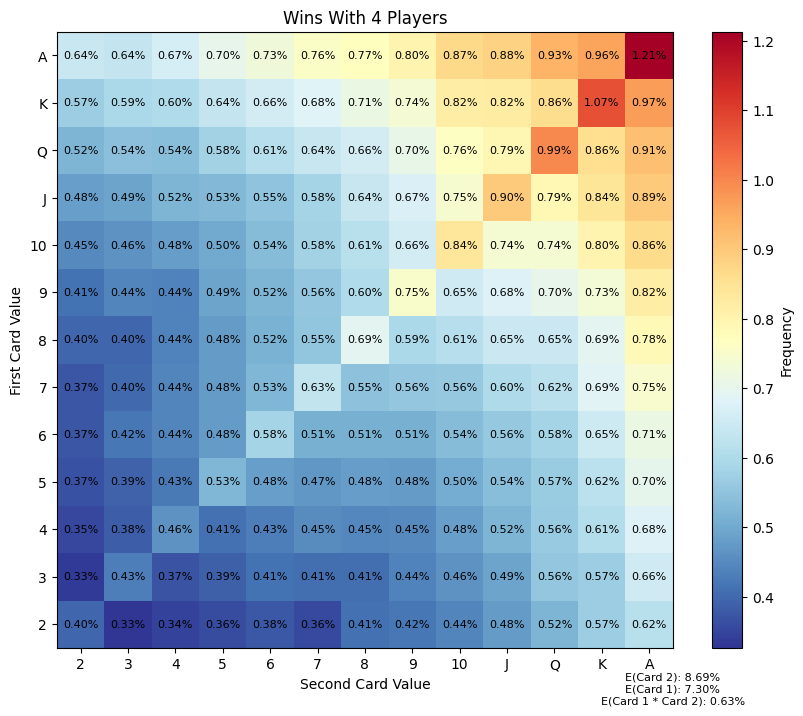

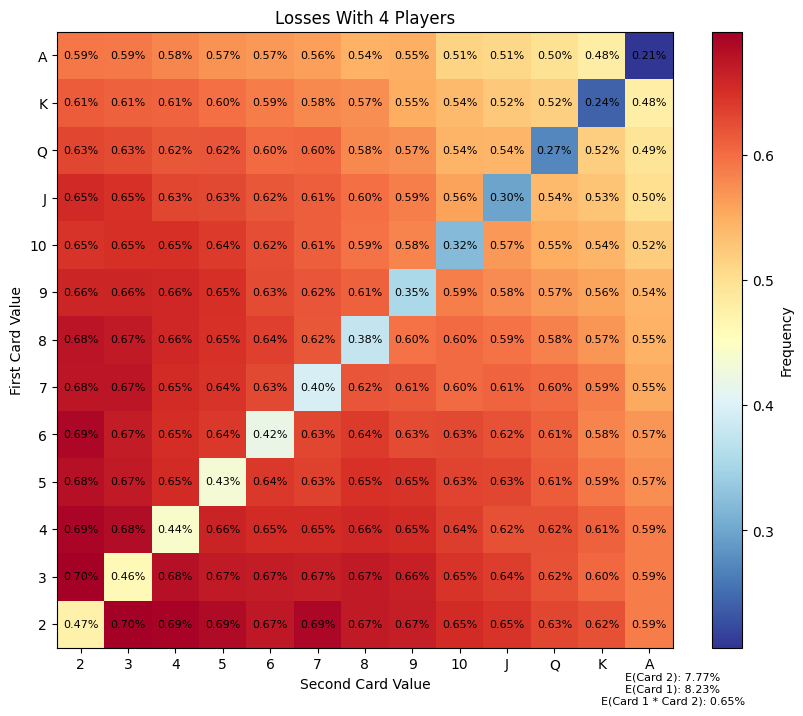

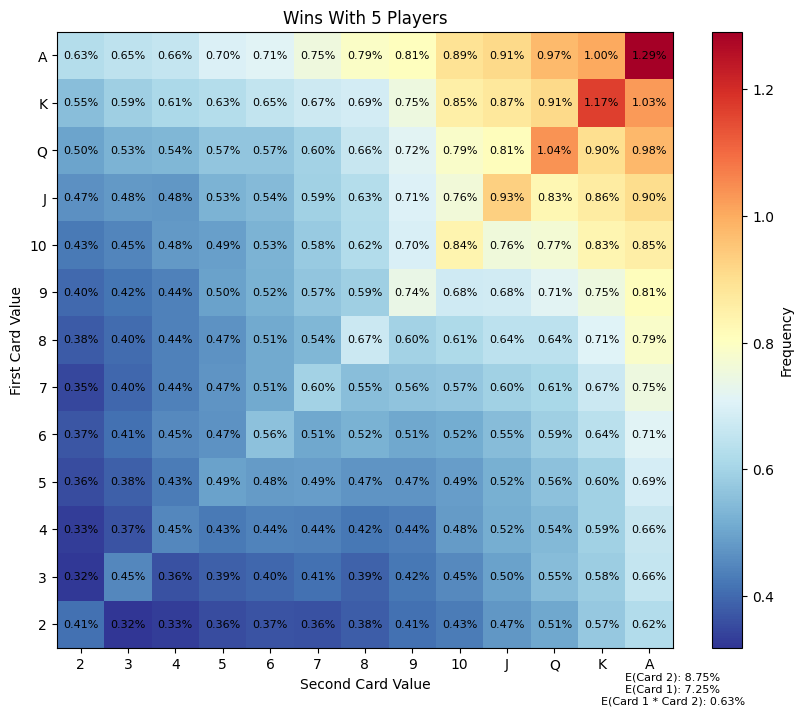

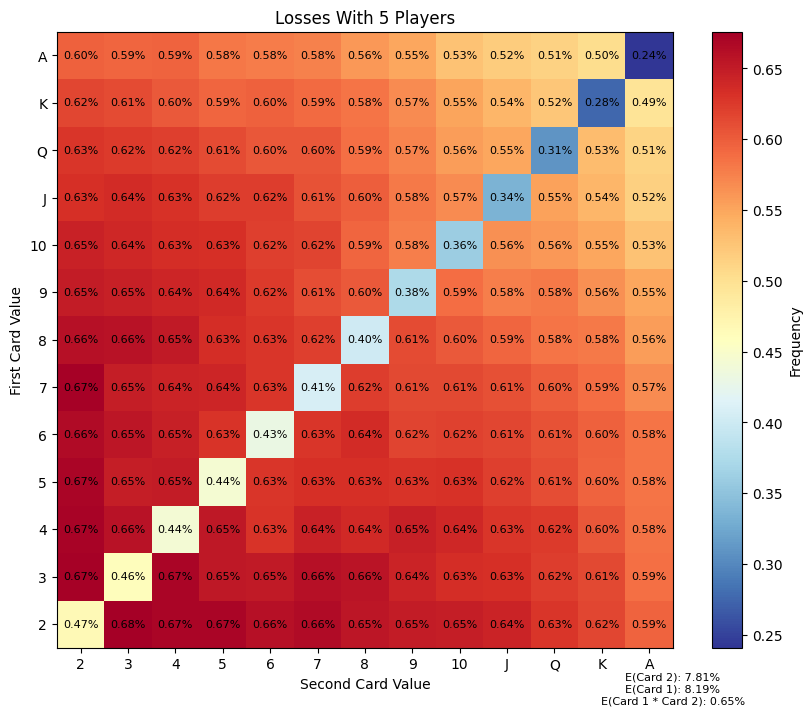

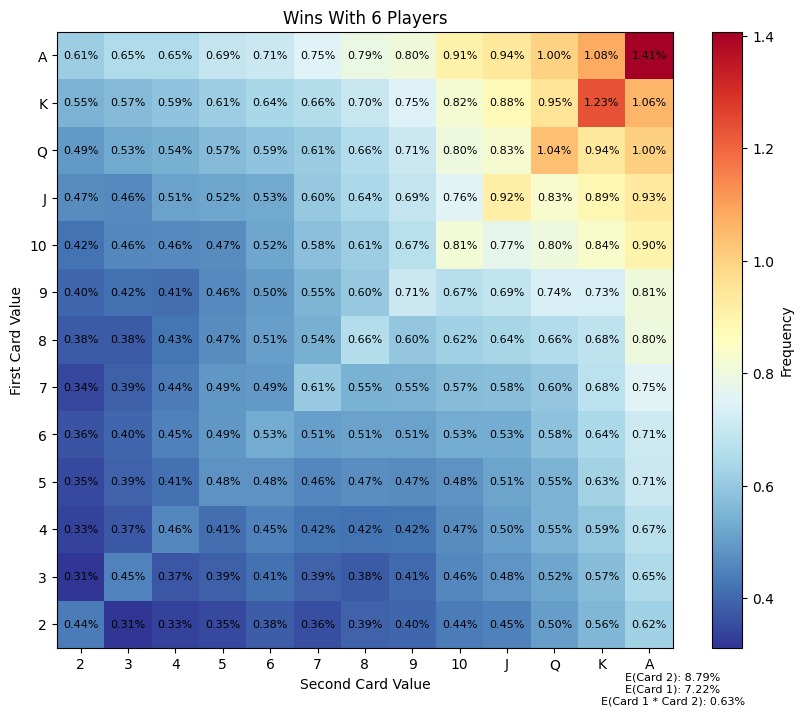

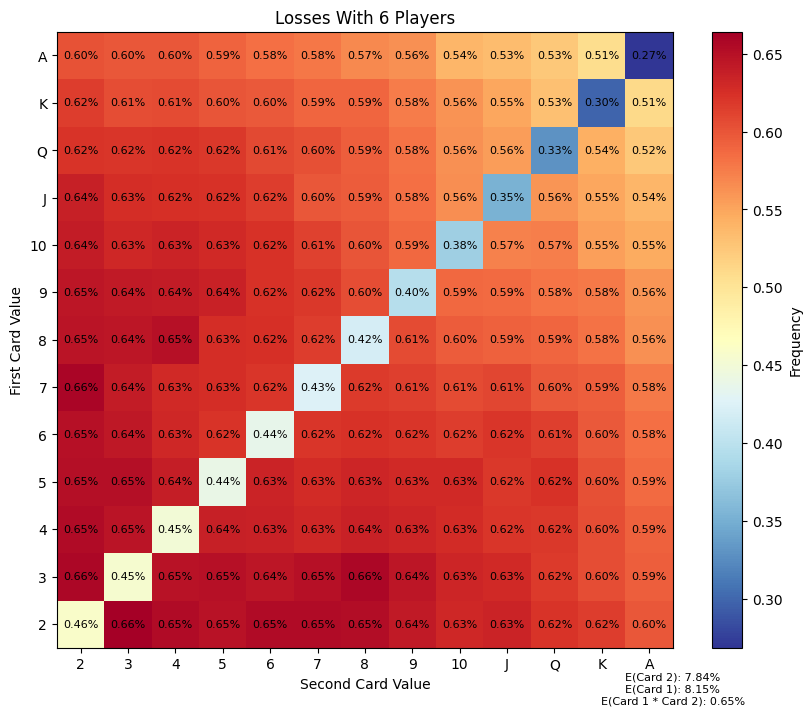

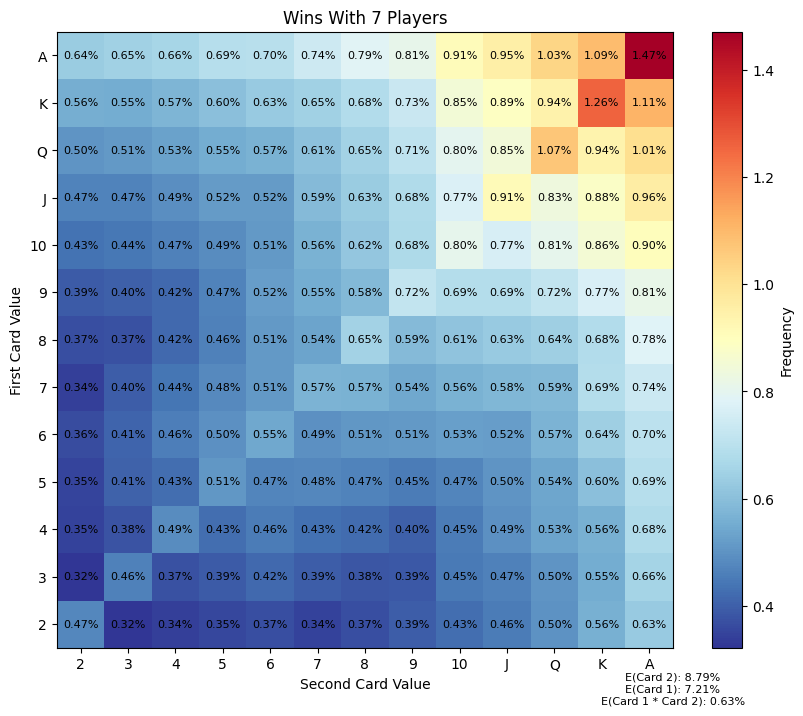

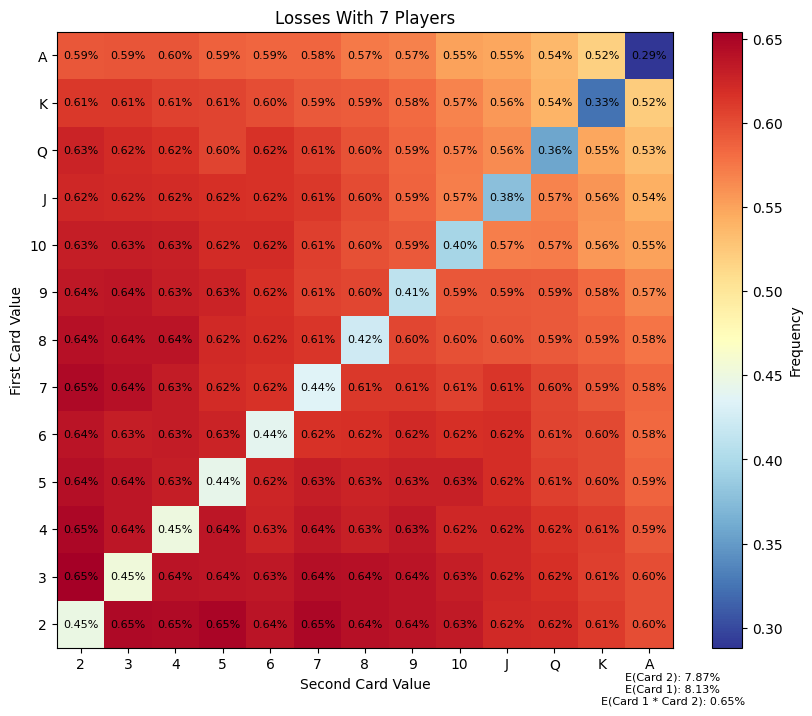

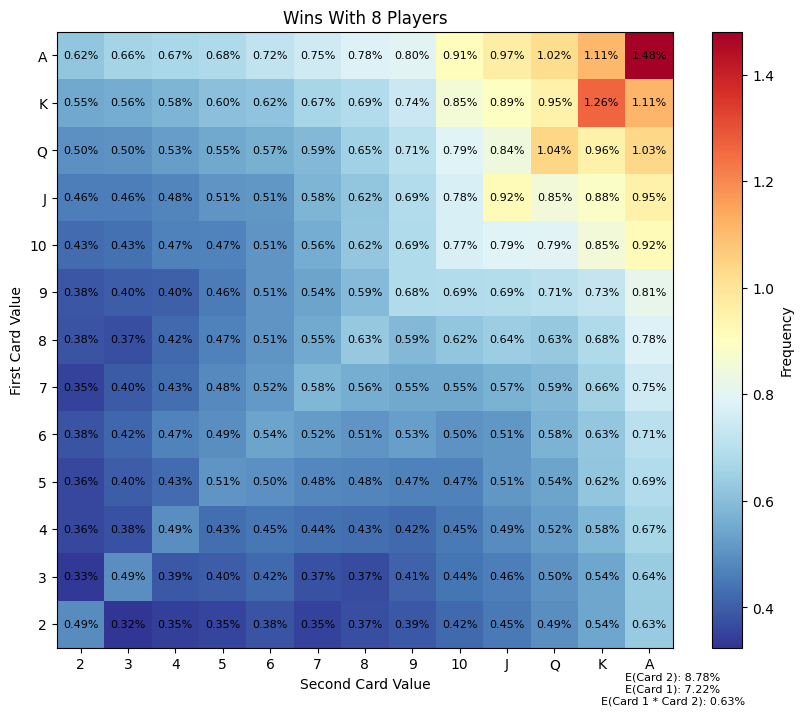

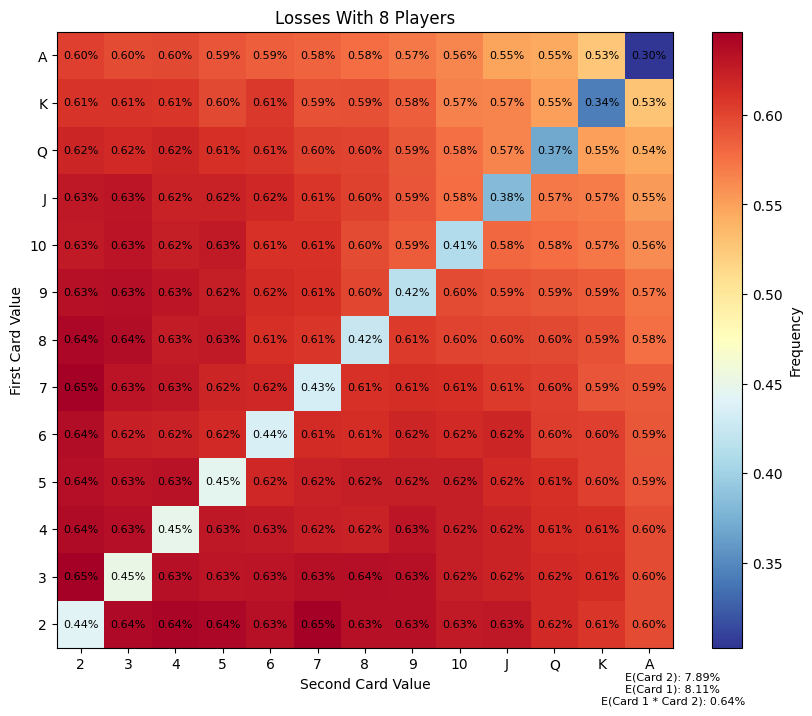

In [6]:
for i in range(2,9):
    data = np.loadtxt("wins/wins_"+str(i)+"_players_1000000_rounds.txt") 
    data /= np.sum(data / 100)
    plot_heatmap(data, title="Wins With "+str(i)+" Players")
    data = np.loadtxt("losses/losses_"+str(i)+"_players_1000000_rounds.txt")
    data /= np.sum(data / 100)
    plot_heatmap(data, title="Losses With "+str(i)+" Players")

Royal Flush Absolute Frequency: 0.00015391%
Straight Flush Absolute Frequency: 0.00138517%
Four of a Kind Absolute Frequency: 0.02400960%
Full House Absolute Frequency: 0.14405762%
Flush Absolute Frequency: 0.19654015%
Straight Frequency: 0.39246468%
Three of a kind Frequency: 2.11284514%
Two Pair Frequency: 4.75390156%
One Pair Frequency: 42.25690276%
High Card Frequency: 50.11773940%


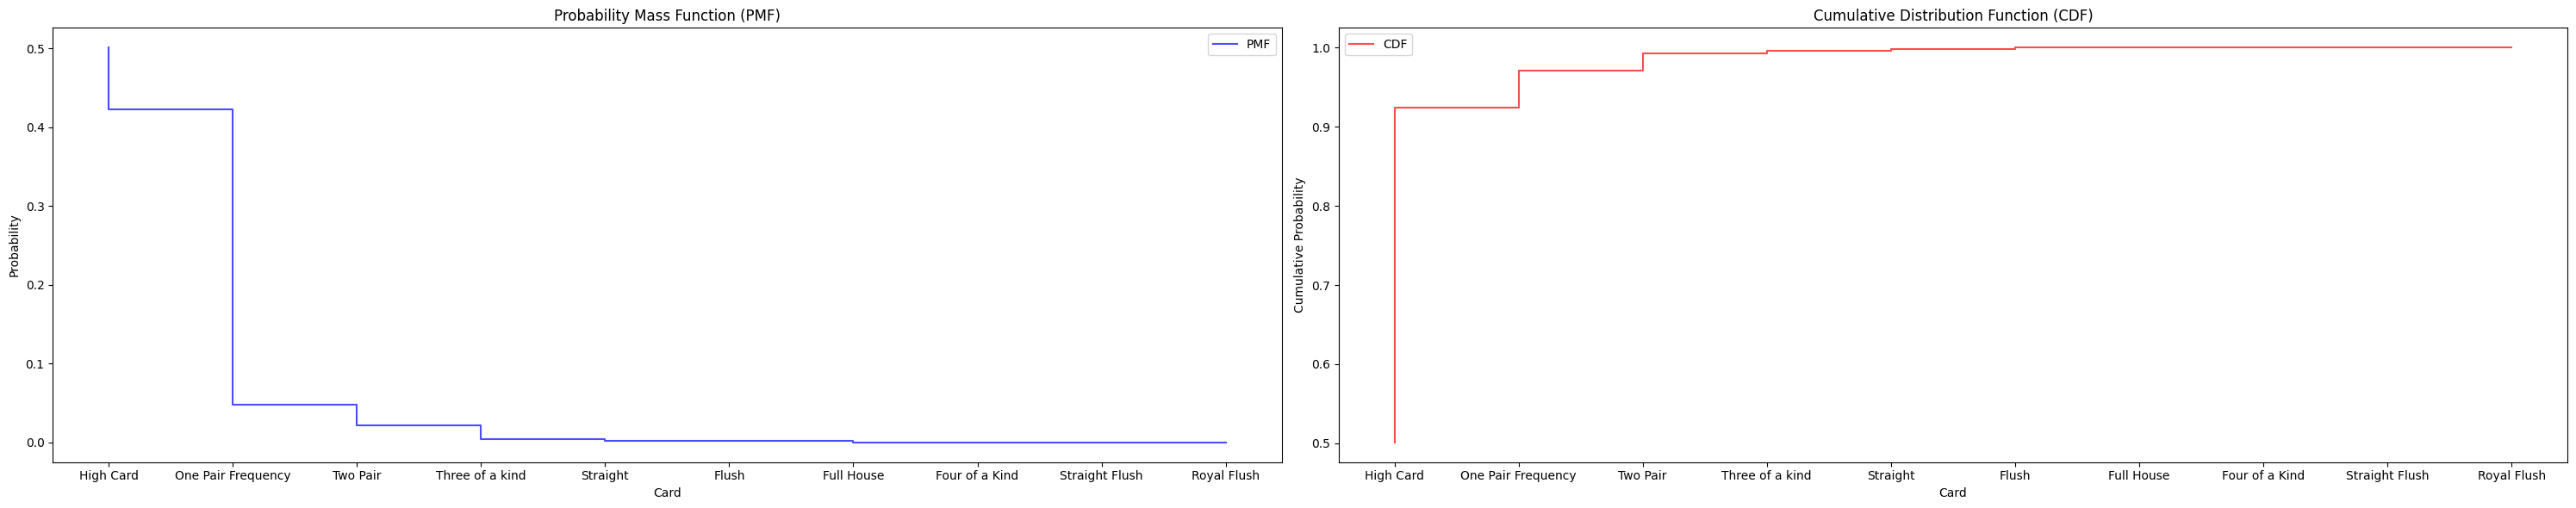

In [7]:
def c(n, r):
    return math.factorial(n) // (math.factorial(r) * math.factorial(n - r))

probabilities = []

abs_frequency = 0
total_combinations = c(52,5)

abs_frequency = c(4,1) # 4 royal flush cases
probabilities.append(abs_frequency / total_combinations)
percentage = (abs_frequency / total_combinations) * 100

print(f"Royal Flush Absolute Frequency: {percentage:.8f}%")

abs_frequency = c(4,1)*c(10,1) - c(4,1) # 10 possible ranks for a straight * 4 possible suits - royal flush cases
probabilities.append(abs_frequency / total_combinations)
percentage = (abs_frequency / total_combinations) * 100
print(f"Straight Flush Absolute Frequency: {percentage:.8f}%")

abs_frequency = c(13,1)*c(4,4)*c(12,1)*c(4,1) # 4 cards of the same value and one card of a different value with any suit
probabilities.append(abs_frequency / total_combinations)
percentage = (abs_frequency / total_combinations) * 100
print(f"Four of a Kind Absolute Frequency: {percentage:.8f}%")

abs_frequency = c(13,1)*c(4,3)*c(12,1)*c(4,2) # 3 cards of the same value and 2 card of a different value 
probabilities.append(abs_frequency / total_combinations)
percentage = (abs_frequency / total_combinations) * 100
print(f"Full House Absolute Frequency: {percentage:.8f}%")

abs_frequency = c(13,5)*c(4,1) - c(10,1)*c(4,1) # 5 cards of the same suit without the possibility of a straight flush and a royal flush
probabilities.append(abs_frequency / total_combinations)
percentage = (abs_frequency / total_combinations) * 100
print(f"Flush Absolute Frequency: {percentage:.8f}%")

abs_frequency = c(10,1)*(c(4,1)**5) - c(10,1)*c(4,1) # 
probabilities.append(abs_frequency / total_combinations)
percentage = (abs_frequency / total_combinations) * 100
print(f"Straight Frequency: {percentage:.8f}%")

abs_frequency = c(13,1)*c(4,3)*c(12,2)*(c(4,1)**2) # 
probabilities.append(abs_frequency / total_combinations)
percentage = (abs_frequency / total_combinations) * 100
print(f"Three of a kind Frequency: {percentage:.8f}%")

abs_frequency = c(13,2)*(c(4,2)**2)*c(11,1)*c(4,1) # 
probabilities.append(abs_frequency / total_combinations)
percentage = (abs_frequency / total_combinations) * 100
print(f"Two Pair Frequency: {percentage:.8f}%")

abs_frequency = c(13,1)*c(4,2)*c(12,3)*(c(4,1) ** 3) # 
probabilities.append(abs_frequency / total_combinations)
percentage = (abs_frequency / total_combinations) * 100
print(f"One Pair Frequency: {percentage:.8f}%")

abs_frequency = ( c(13,5) - c(10,1) ) * ((c(4,1)**5)-c(4,1))
probabilities.append(abs_frequency / total_combinations)
percentage = (abs_frequency / total_combinations) * 100
print(f"High Card Frequency: {percentage:.8f}%")

probabilities = probabilities[::-1]

plot_probabilities(probabilities)

{'Royal Flush': 530, 'Straight Flush': 3605, 'Four of a Kind': 4902, 'Full House': 70900, 'Flush': 79792, 'Straight': 90643, 'Three of a Kind': 137975, 'Two Pair': 662436, 'One Pair': 1253875, 'High Card': 495342}


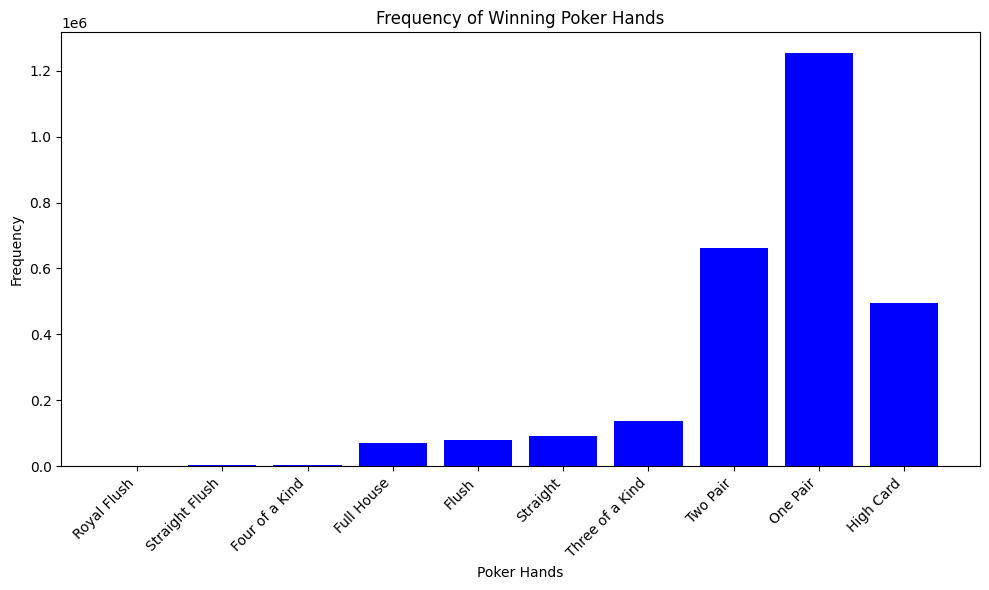

In [8]:
with open('frequencies.json', 'r') as file:
    data = json.load(file)

print(data)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(data.keys(), data.values(), color='blue')
plt.xlabel('Poker Hands')
plt.ylabel('Frequency')
plt.title('Frequency of Winning Poker Hands')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Display the histogram
plt.show()

{'Royal Flush': 7519, 'Straight Flush': 46260, 'Four of a Kind': 59117, 'Full House': 893649, 'Flush': 1014761, 'Straight': 1121116, 'Three of a Kind': 1714291, 'Two Pair': 8270260, 'One Pair': 15691339, 'High Card': 6181688}


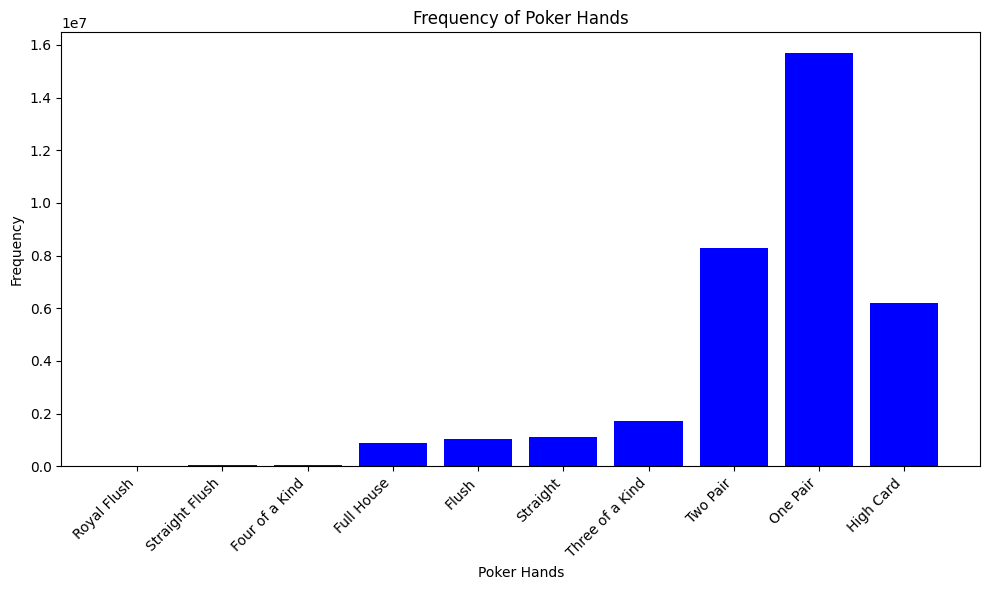

In [9]:
with open('all_hands_frequencies.json', 'r') as file:
    data = json.load(file)

print(data)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(data.keys(), data.values(), color='blue')
plt.xlabel('Poker Hands')
plt.ylabel('Frequency')
plt.title('Frequency of Poker Hands')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Display the histogram
plt.show()

In [10]:
all_row_sums = np.empty((0, 13))

# Loop through the number of players (2 through 8)
# The chi-square test is sensitive to sample size so we limit it to 100 rounds for each game
for num_players in range(2, 9):
    # Load the data from the file
    file_path = f"wins/wins_{num_players}_players_100_rounds.txt"
    data = np.loadtxt(file_path)


    # Calculate row sums and concatenate to the result array
    row_sums = np.sum(data, axis=1)
    all_row_sums = np.concatenate((all_row_sums, row_sums.reshape(-1, 13)))

# Print the concatenated result
# Technically, we want proportions as columns, but the chi-square test result is the same either way
print(all_row_sums.T)
chi2_stat, p_value, _, _ = chi2_contingency(all_row_sums.T)

print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Check the significance level (e.g., 0.05)
alpha = 0.05
print(f"Is the result significant at {alpha} level? {'Yes' if p_value < alpha else 'No'}")

[[ 3.  6.  5.  6.  4.  6.  7.]
 [11.  5.  6.  6.  5.  6.  3.]
 [10. 10.  5. 10.  6.  5.  9.]
 [ 6.  7. 11.  6.  7.  5.  6.]
 [ 8.  7.  8.  6.  4.  5. 14.]
 [ 6.  6.  5.  4.  7.  7.  3.]
 [ 1.  4.  7.  4. 11. 11.  2.]
 [ 7. 12.  6.  9.  7.  6.  5.]
 [ 8. 10. 12.  8. 13. 13. 10.]
 [10.  6.  7. 15.  6.  7.  9.]
 [ 8.  8.  9.  6.  6.  7. 14.]
 [ 8.  9.  8.  9.  9. 11.  8.]
 [14. 10. 11. 11. 15. 11. 10.]]
Chi-square statistic: 67.0521333274158
P-value: 0.6429101975462894
Is the result significant at 0.05 level? No
